In [15]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
import seaborn as sns

from sklearn import set_config
set_config(transform_output='pandas')

In [4]:
def get_metrics(y_true,y_pred):
    dict_metrics = {
        'R2':metrics.r2_score(y_true,y_pred),
        'MAE':metrics.mean_absolute_error(y_true,y_pred),
        'MAPE':metrics.mean_absolute_percentage_error(y_true,y_pred),
        'RMSE':np.sqrt(metrics.mean_absolute_error(y_true,y_pred))
    }
    return dict_metrics

In [5]:
df=pd.read_csv('D:\Desktop\Scripts\DNC_deploy_class\data\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\João Eduardo Felipin\AppData\Local\Temp\ipykernel_9200\891665943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


<Axes: >

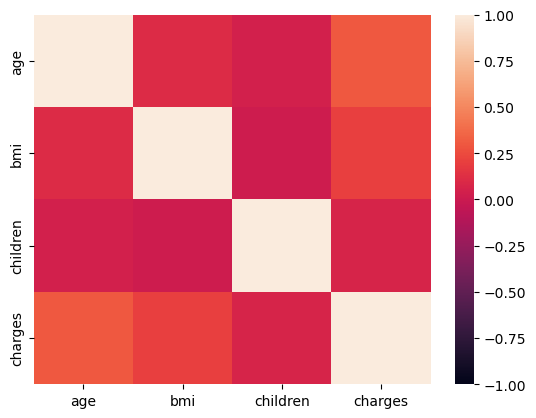

In [9]:
df_corr = df.corr()
sns.heatmap(df_corr,vmax=1,vmin=-1)

In [10]:
numerical_features = ['age','bmi','children']
cat_features = ['sex','smoker','region']

features = numerical_features + cat_features

target = 'charges'

In [11]:
x=df[features]
y=df[target]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2023)

In [13]:
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='if_binary',handle_unknown='ignore',sparse_output=False)

preprocessor = ColumnTransformer([
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,cat_features)
])

preprocessor.fit_transform(x_train)

,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northeast,cat__region_northwest,cat__region_southeast,cat__region_southwest
1068,0.978261,0.153349,0.2,1.0,0.0,0.0,1.0,0.0,0.0
1018,0.782609,0.534167,0.6,0.0,0.0,0.0,1.0,0.0,0.0
995,0.456522,0.196798,0.6,0.0,0.0,1.0,0.0,0.0,0.0
1248,0.000000,0.641916,0.0,0.0,0.0,0.0,0.0,1.0,0.0
549,0.543478,0.813559,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
884,0.152174,0.288808,0.8,1.0,0.0,0.0,1.0,0.0,0.0
515,0.869565,0.531073,0.0,1.0,0.0,0.0,0.0,0.0,1.0
695,0.173913,0.651735,0.0,0.0,0.0,0.0,1.0,0.0,0.0
454,0.304348,0.822437,0.4,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',DummyRegressor())
])

model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', DummyRegressor())])

In [16]:
params = {
    'model': [
        DummyRegressor(),
        LinearRegression(),
        LassoCV(),
        RidgeCV(),
        RandomForestRegressor(),
        GradientBoostingRegressor()
    ]
}

grid_model = GridSearchCV(model_pipeline,params,cv=5,scoring='r2')

In [17]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model', DummyRegressor())]),
             param_grid={'model': [DummyRegressor(), LinearRegression(),
                                   LassoCV(), RidgeCV(),
                                   RandomForestRegressor(),
                                   GradientBoostingRegressor()]},
             scoring='r2')

In [18]:
grid_model.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('model', GradientBoostingRegressor())])

In [19]:
model_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',GradientBoostingRegressor(random_state=2023))
])

params={
    'model__learning_rate':[0.1,0.01]
}

grid_model= GridSearchCV(model_pipeline,params,cv=5,scoring='r2',n_jobs=-1,verbose=1)
grid_model.fit(x_train,y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['age',
                                                                          'bmi',
                                                                          'children']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('model',
                                        GradientBoostingRegressor(random_state=2023))]),
             n_jobs=-1, param_grid={'model__learning_rate': [0.1, 0.01]},
             scoring='r2', verbose=1)

NameError: name 'grid_model' is not defined